# BANK MARKETING: Predicting whether the customer will subscribe to term deposit (FIXED DEPOSIT) or not.

--Project Description
A client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. 

Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

--About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of a Polish banking institution will subscribe to a term deposit product of the bank or not. 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [3]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Target variable is subscribed

In [5]:
# check the df structe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Observations:
1. There is no missing value in any of the variables, all have a total of 31647 rows
2. 

In [6]:
#To check if there is any column with null value and counts of such null value
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Observations:
There is no null value in the dataset

In [7]:
df_train.shape

(31647, 18)

--Variablea and their meanings
ID:              Unique client ID
age:             Age of the client
job:             Type of job
marital:         Marital status of the client
education:       Education level
default:         Credit in default.
housing:         Housing loan
loan:            Personal loan
contact:         Type of communication
month:           Contact month
day_of_week:     Day of week of contact
duration:        Contact duration
campaign:        number of contacts performed during this campaign to the client
pdays:           number of days that passed by after the client was last contacted
previous:        number of contacts performed before this campaign
poutcome:        outcome of the previous marketing campaign


In [8]:
# describe df numerical columns
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Examine unique values of column - objects
for col in df_train.select_dtypes(include='object').columns:
    print(col)
    print(df_train[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


Take away
1. The dataset has 9 categorical features.
2. Non of the categorical variables has single value particularly those of object datatype
3. Job and Month have the highest numbers of categorical values

In [10]:
# Find counts of unique value of each feature
for column in df_train.columns:
    print(column,df_train[column].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


This validates no feature has one value.

# Exploratory Data  Analysis (EDA)

In [11]:
#Find and remove unwanted Column(s)
# ID column is not required for the analysis and thus to be removed.
df_train1 = df_train.drop(['ID'], axis=1, inplace=True)

In [12]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


ID column has been removed, therefore 7 numerical variables

In [13]:
#Identifing categorical variables
categorical_variables=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

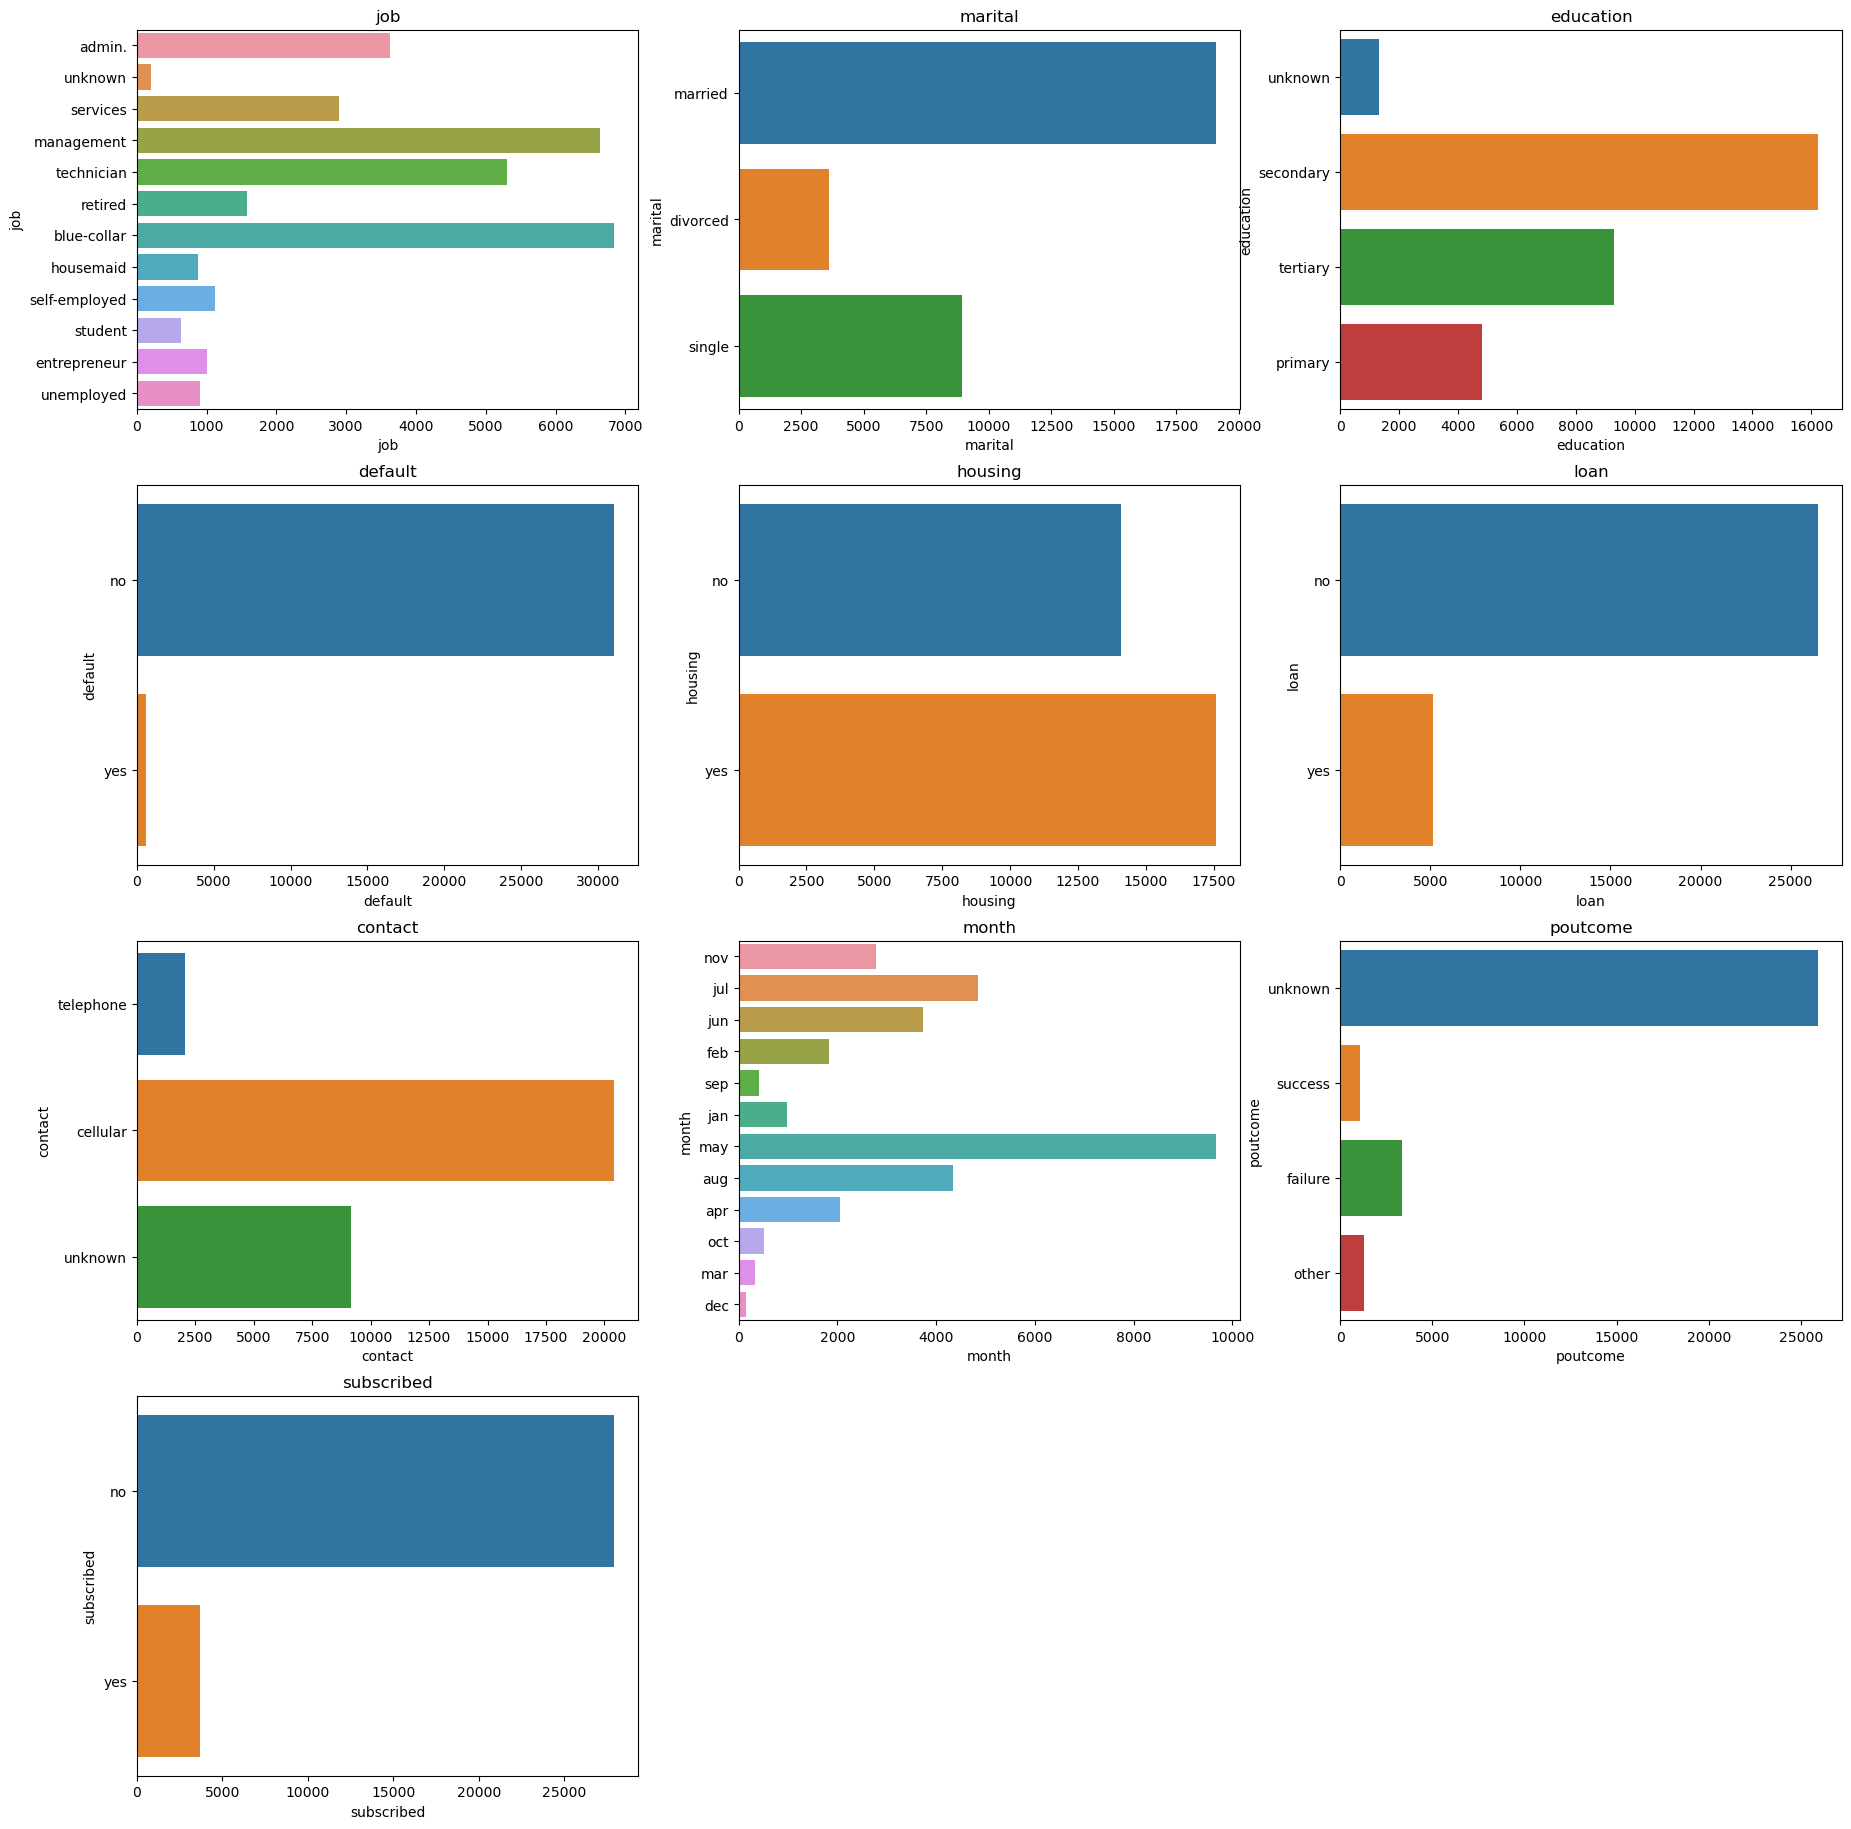

In [14]:
# Categorical variables and their Distribution
plt.figure(figsize=(22,70), facecolor='white')
plotnumber =1
for categorical_variable in categorical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_variable,data=df_train)
    plt.xlabel(categorical_variable)
    plt.title(categorical_variable)
    plotnumber+=1
plt.show()

Observations:
1. client with job type as blue-collar records are high in the given dataset while sttudent is the least.
2. client who married are high and divorced are less
3. client whose education background is secondary are in high numbers.
4. Default feature seems not playing an importand role as its value of 'no' to ratio of 'yes' is not so significant which can affect value of 'yes'
4. data in month of may is high and less in dec

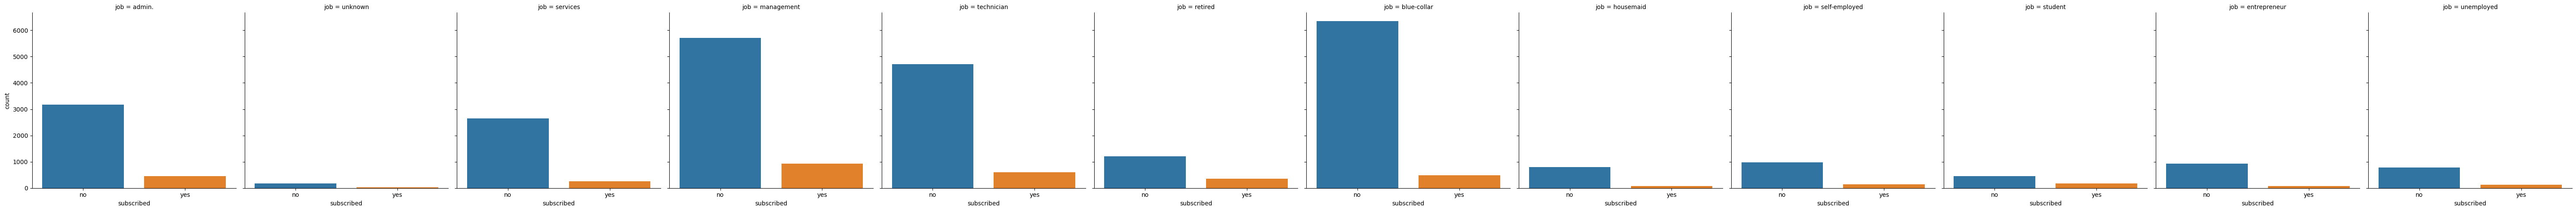

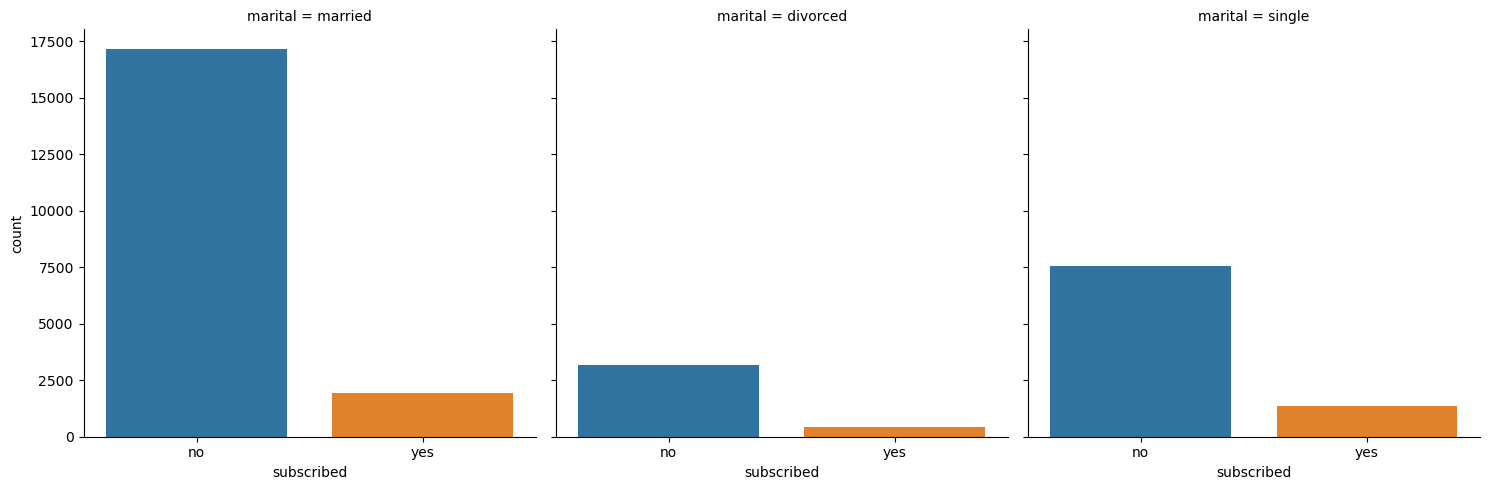

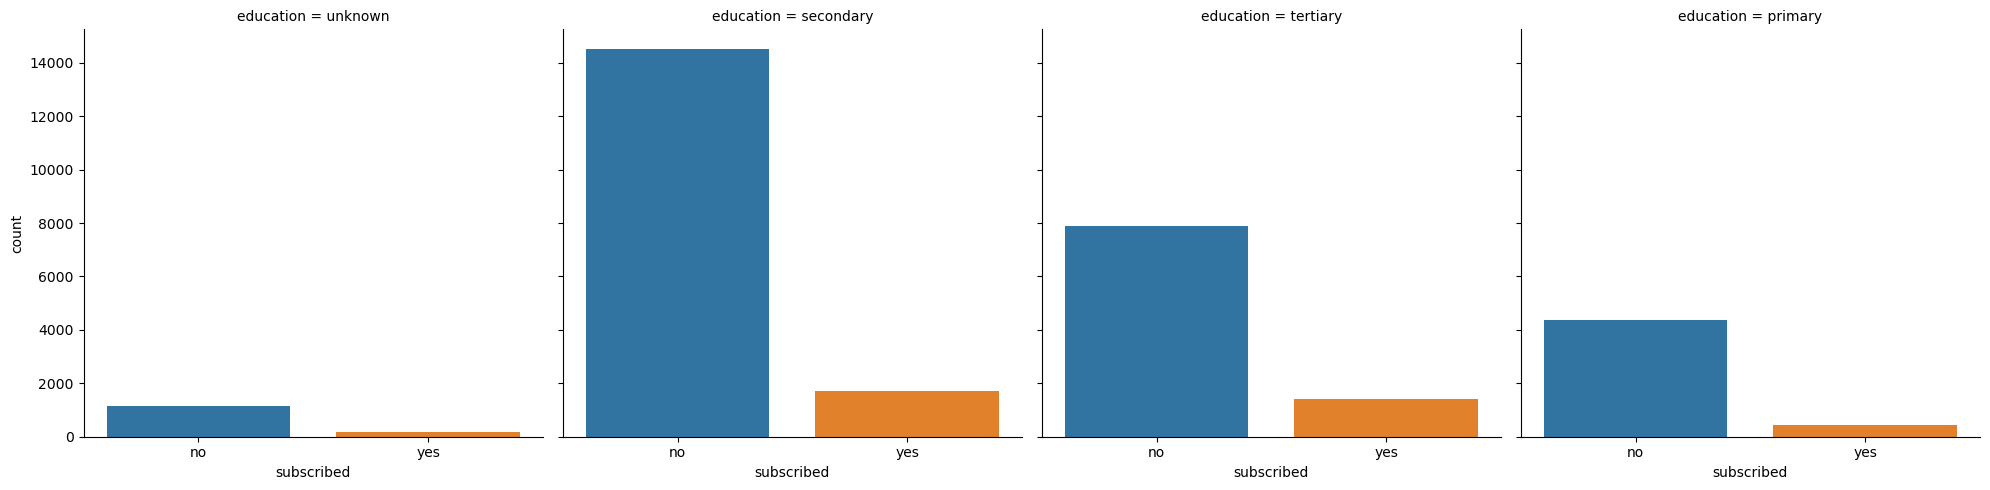

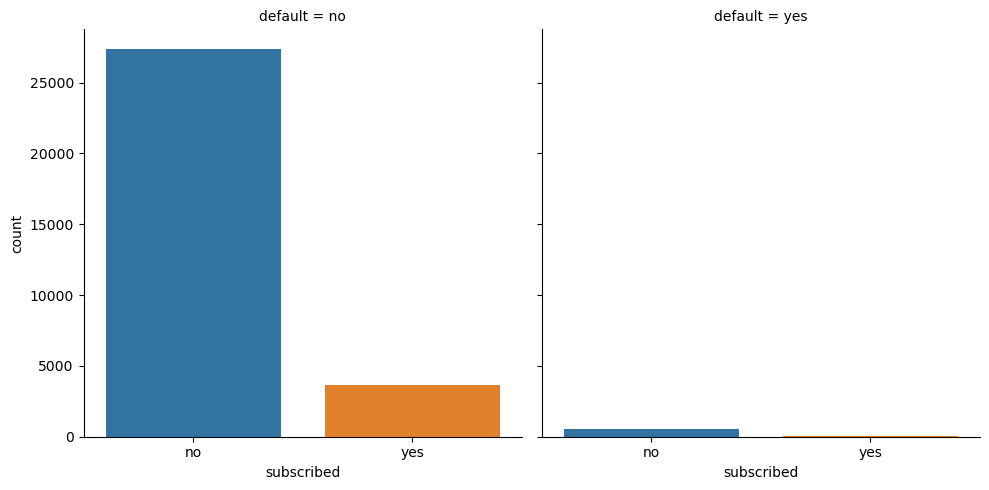

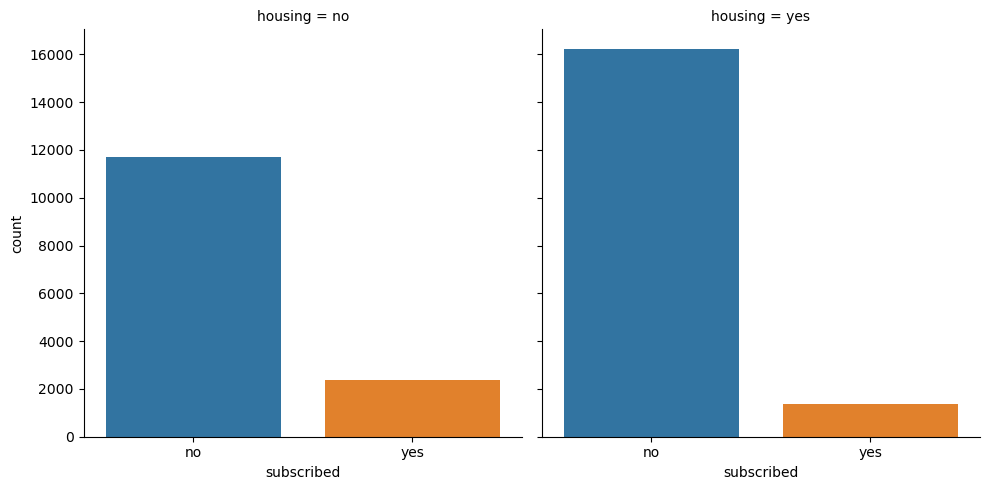

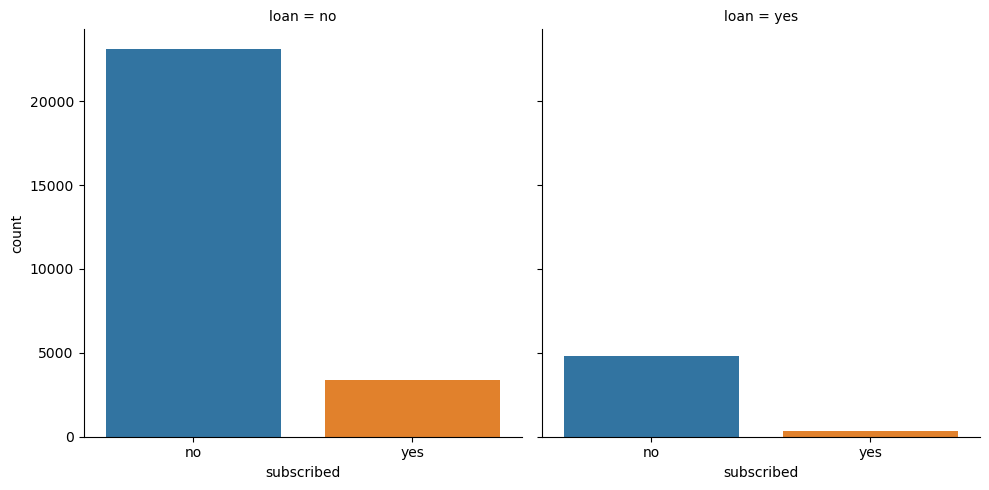

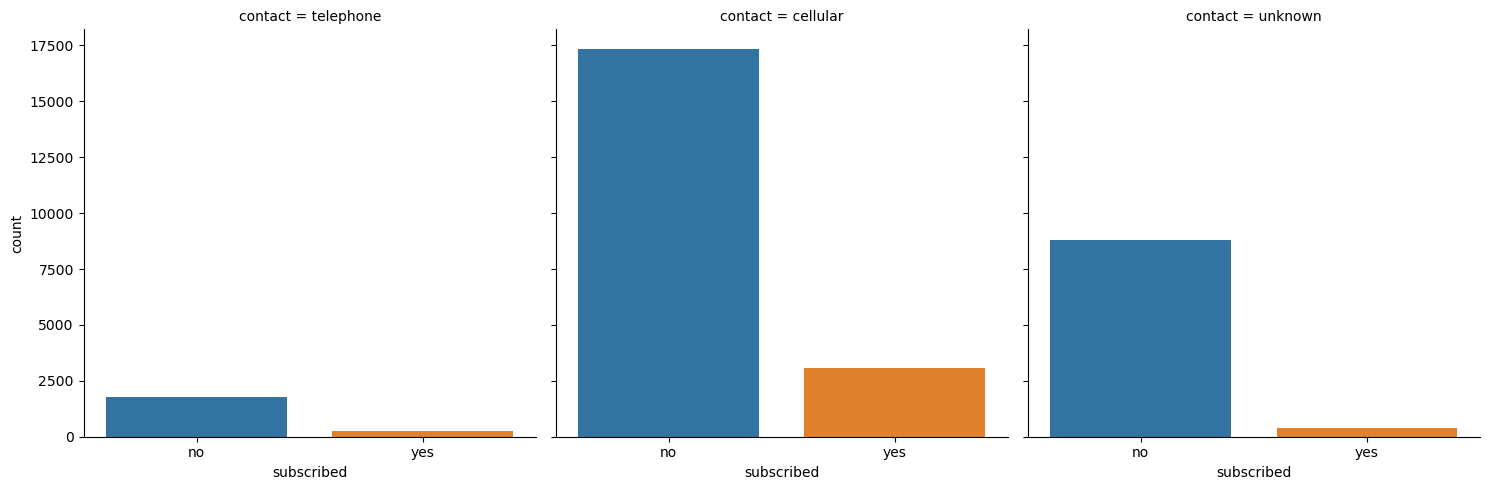

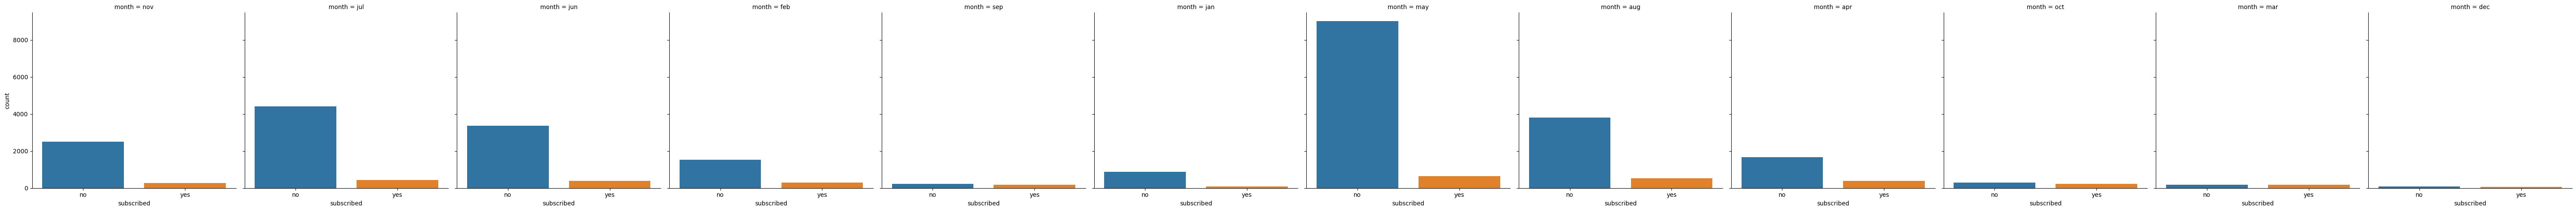

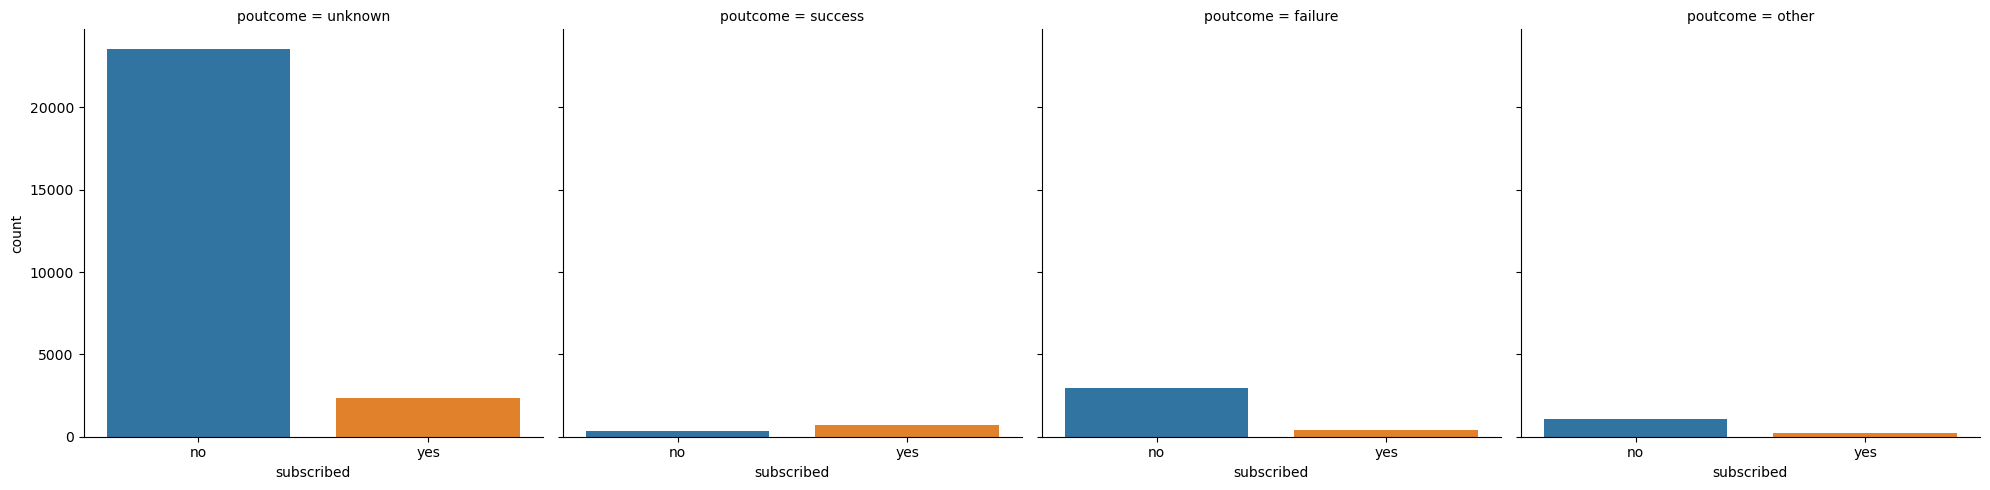

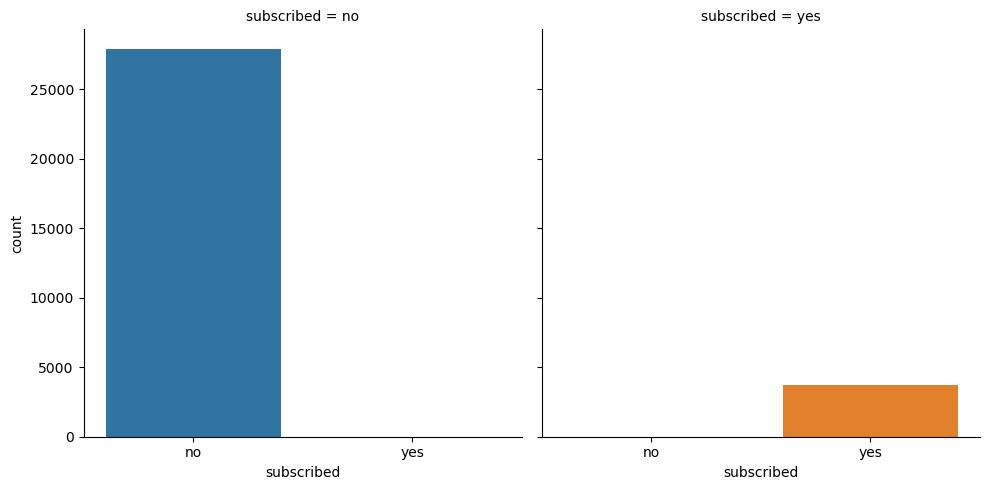

In [15]:
#Categorical variables and target
#To find out the relationship between categorical variable and dependent variable
for categorical_variable in categorical_variables:
    sns.catplot(x='subscribed', col=categorical_variable, kind='count', data= df_train)
plt.show()

In [16]:
#Check target label split over categorical features and find the count
for categorical_variable in categorical_variables:
    print(df_train.groupby(['subscribed',categorical_variable]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

retired client has high interest on deposit
client who has housing loan seems to be not interested much on deposit
if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
in month of March, September, October and December, client show high interest to deposit
in month of may, records are high but client interst ratio is very less

In [17]:
# Distribution of Continous Numerical Features
# list of numerical variables
numerical_variables = [future for future in df_train.columns if ((df_train[future].dtypes != 'O') & (future not in ['subscribed']))]
print('Number of numerical variables: ', len(numerical_variables))

# visualise the numerical variables
df_train[numerical_variables].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


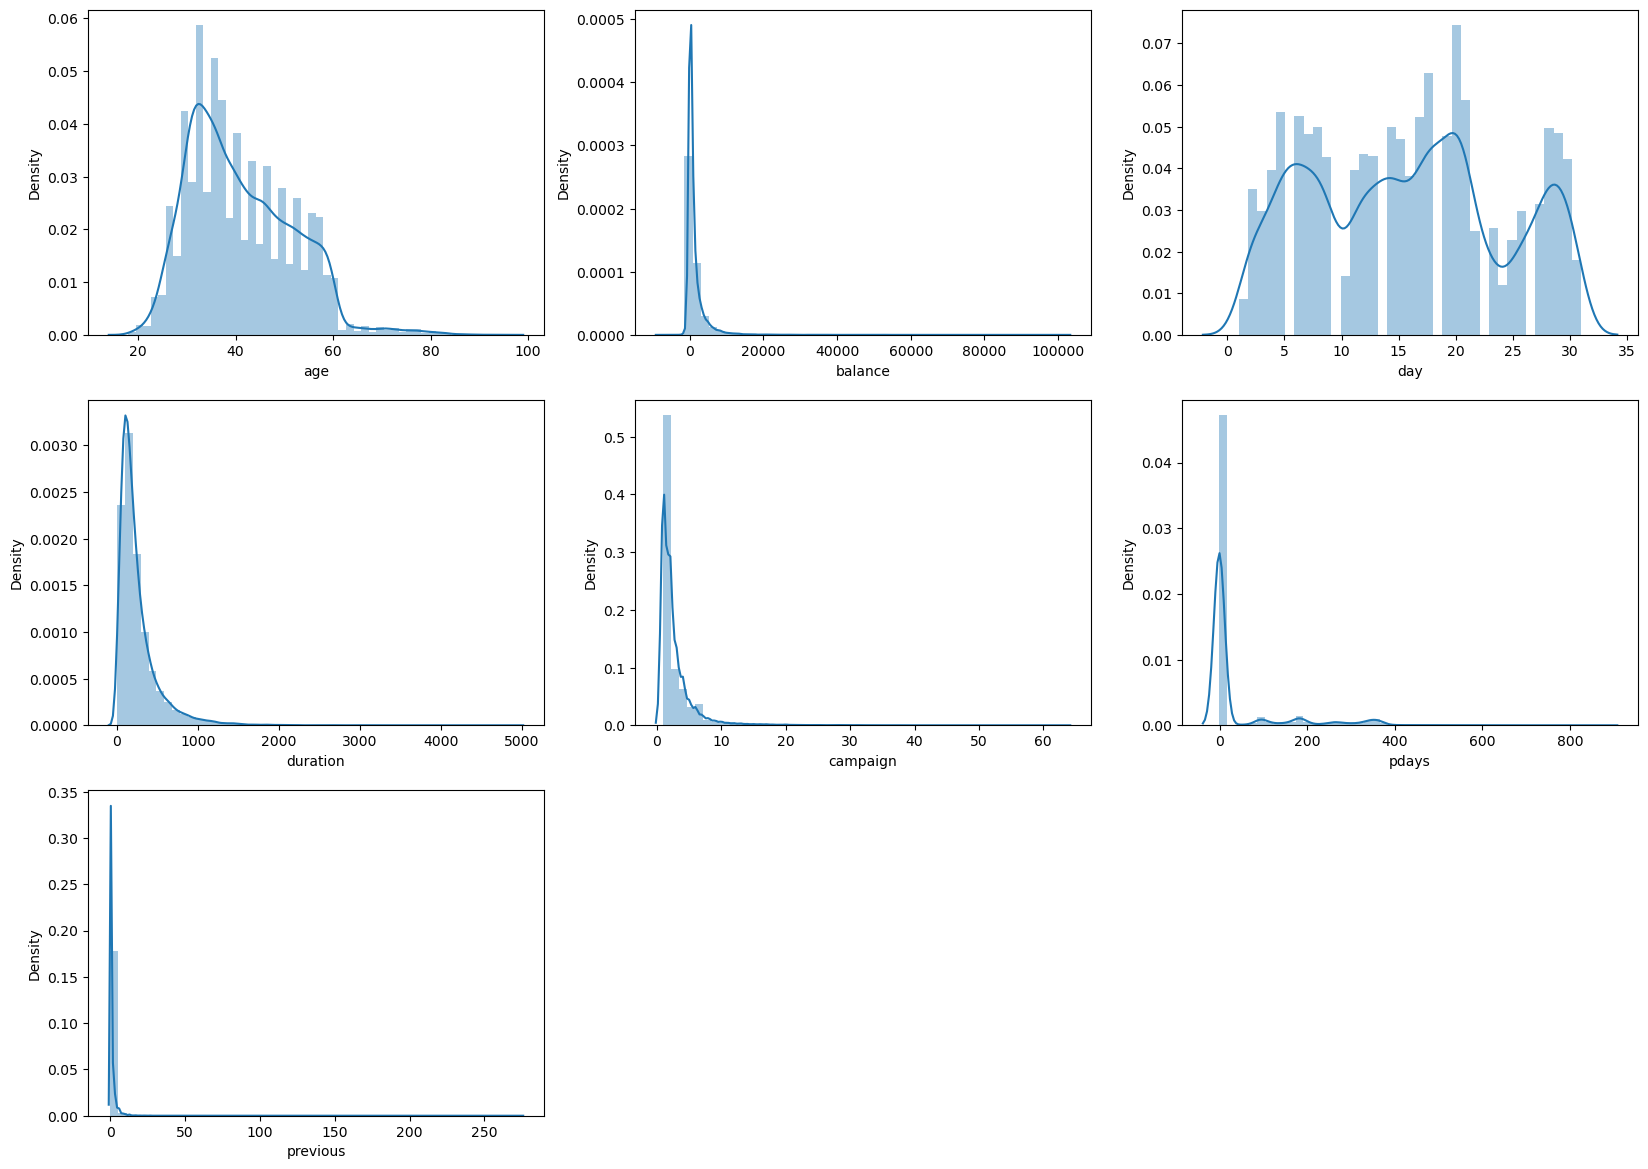

In [18]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_variable in numerical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[numerical_variable])
    plt.xlabel(numerical_variable)
    plotnumber+=1
plt.show()

Take-away:
1. age and days seem to be distributed normally
2. balance, duration, compaign, pdays and previous were skewed towards left, this seems to have some outliers.

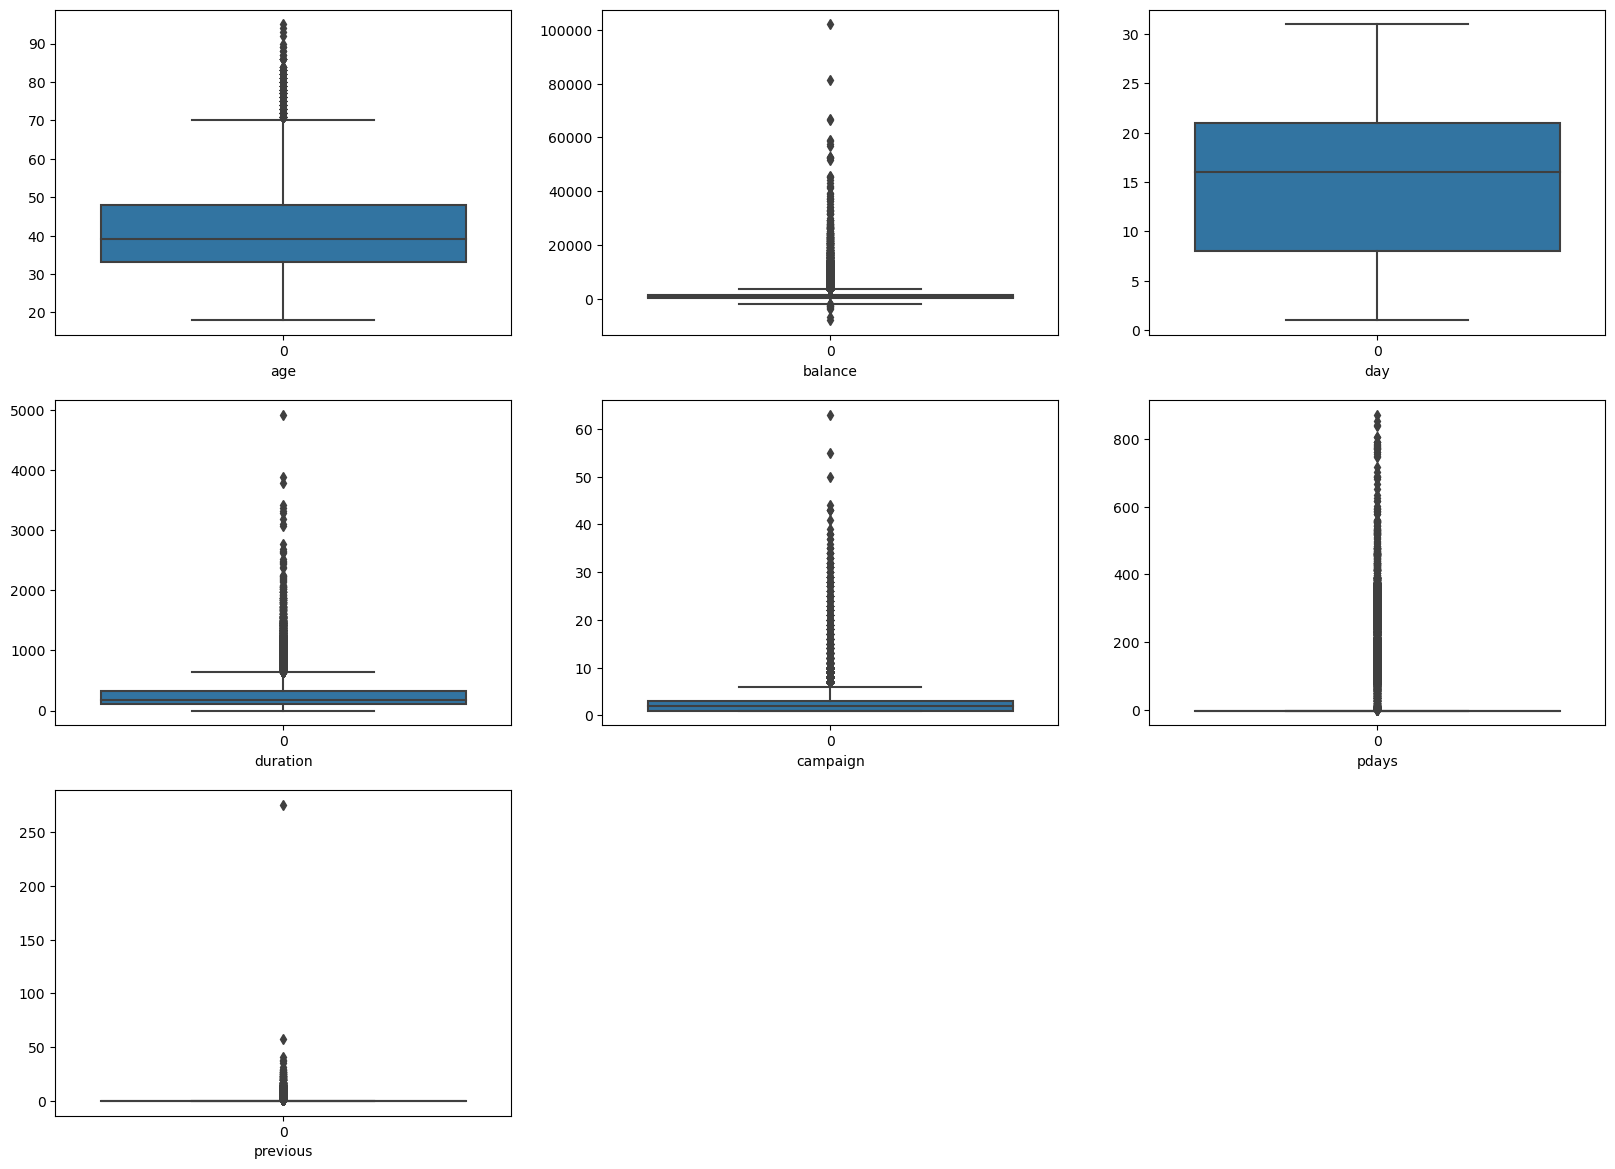

In [19]:
#Outliers in numerical variables
#boxplot on numerical variables to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_variable in numerical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_variable])
    plt.xlabel(numerical_variable)
    plotnumber+=1
plt.show()

age, balance, duration, compaign, pdays and previous have some outliers

<Axes: >

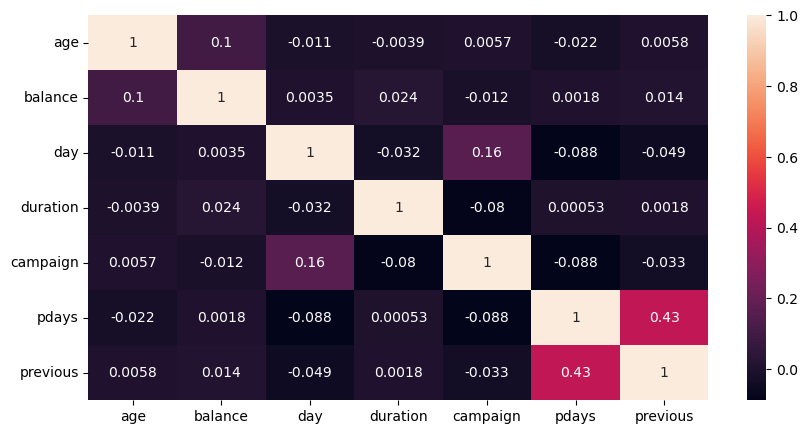

In [20]:
#Correlation among the numerical features
cor_mat=df_train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True)

it looks that there is no feature/variable which is heavily correlated with other features

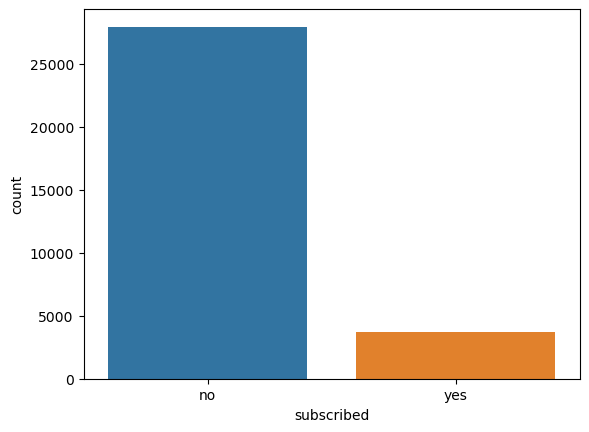

In [21]:
#total clients count on subscribed labeled target
sns.countplot(x='subscribed',data=df_train)
plt.show()

In [22]:
df_train['subscribed'].groupby(df_train['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [23]:
# Encoding the subscribed column into binary classification of 1 and 0
# Where 1 represents customer willing to subscribe and 0 customers unwilling to subscribe
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [24]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [25]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Bivariate Analysis

In [26]:
# Jobs and Subscribed
print(pd.crosstab(df_train['job'],df_train['subscribed']))

subscribed        0    1
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [27]:
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)


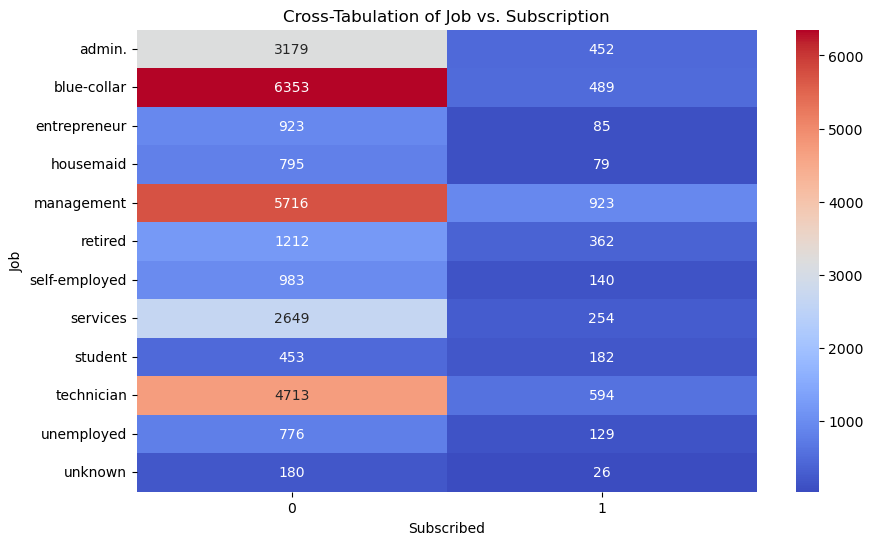

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(job, annot=True, fmt='d', cmap='coolwarm')  # Create a heatmap

# Customize the plot
plt.title('Cross-Tabulation of Job vs. Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Job')

# Show the plot
plt.show()

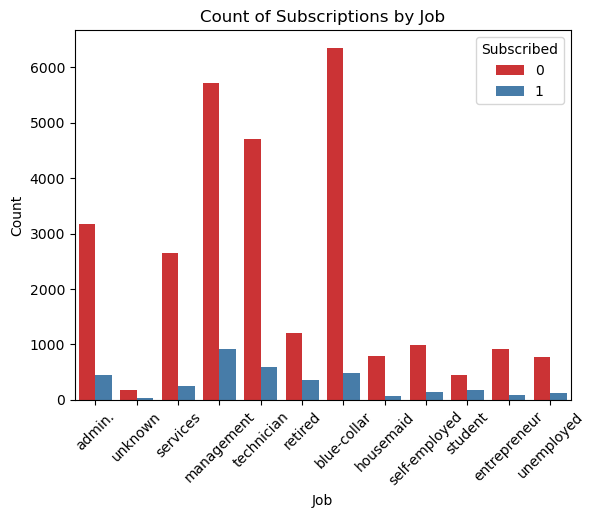

In [29]:
# Create a countplot using Seaborn
sns.countplot(x='job', hue='subscribed', data=df_train, palette='Set1')

# Customize the plot
plt.title('Count of Subscriptions by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Subscribed', labels=['0', '1'])  # Add a legend
plt.show()

In [30]:
# Marital status and Subscribed
print(pd.crosstab(df_train['marital'],df_train['subscribed']))

subscribed      0     1
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


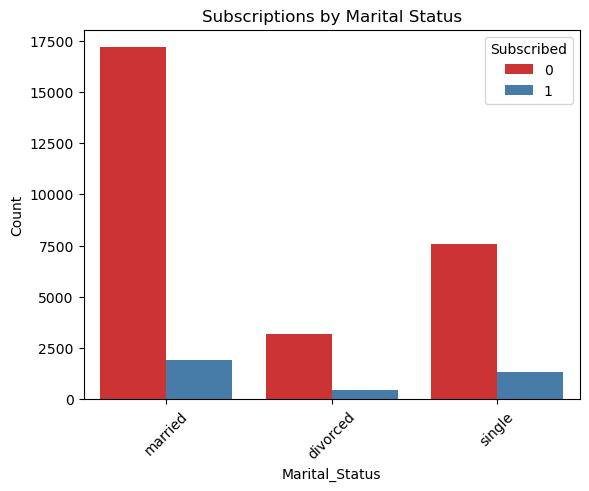

In [31]:
# Create a countplot using Seaborn
sns.countplot(x='marital', hue='subscribed', data=df_train, palette='Set1')

# Customize the plot
plt.title('Subscriptions by Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Subscribed', labels=['0', '1'])  # Add a legend
plt.show()

In [32]:
# Education level and Subscribed
print(pd.crosstab(df_train['education'],df_train['subscribed']))

subscribed      0     1
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


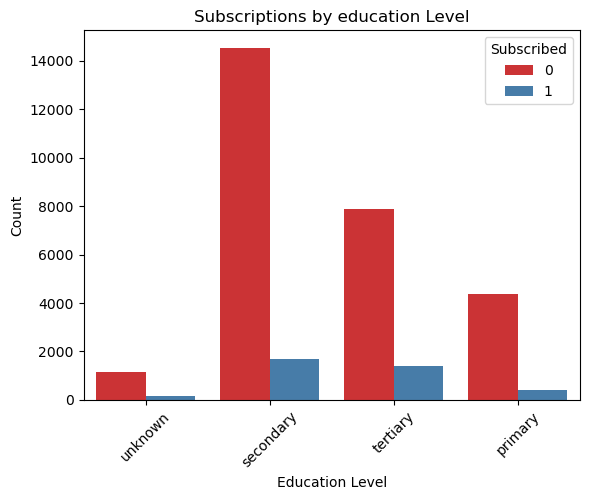

In [33]:
# Create a countplot using Seaborn
sns.countplot(x='education', hue='subscribed', data=df_train, palette='Set1')

# Customize the plot
plt.title('Subscriptions by education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Subscribed', labels=['0', '1'])  # Add a legend
plt.show()

In [34]:
# Default and Subscribed
print(pd.crosstab(df_train['default'],df_train['subscribed']))

subscribed      0     1
default                
no          27388  3674
yes           544    41


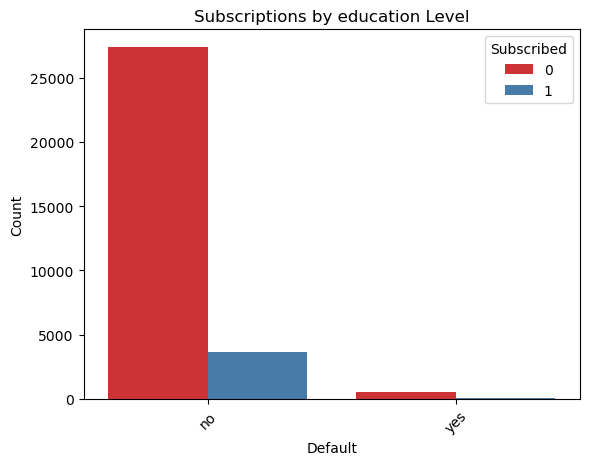

In [35]:
# Create a countplot using Seaborn
sns.countplot(x='default', hue='subscribed', data=df_train, palette='Set1')

# Customize the plot
plt.title('Subscriptions by education Level')
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Subscribed', labels=['0', '1'])  # Add a legend
plt.show()

Take-away:
This suggest that customers having no previous default record have slightly higher chances of subscribing to a term loan as compared to those who have previous default.

In [36]:
#Correlation matrix
train_corr = df_train.corr()
train_corr

,age,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

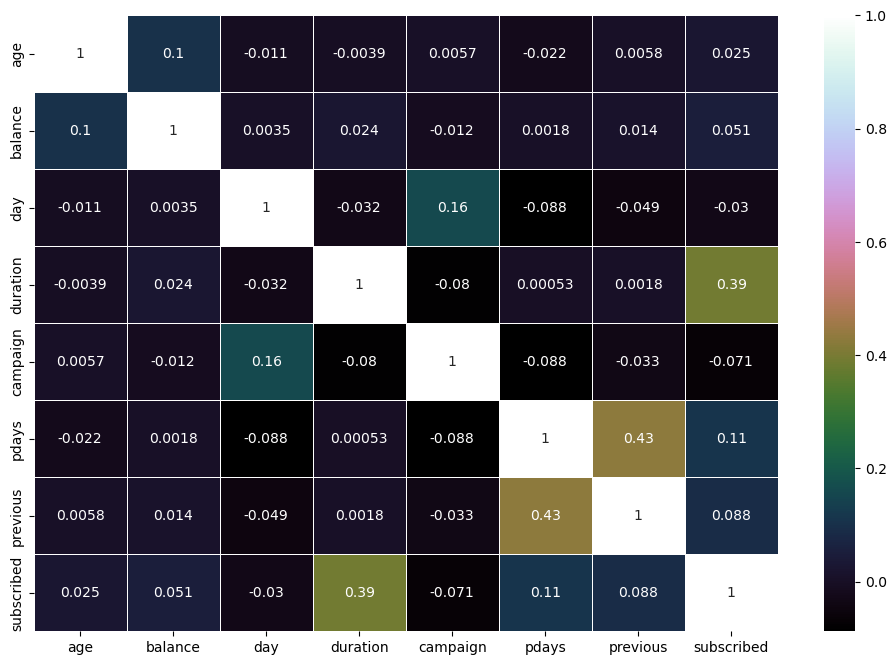

In [37]:
#plot a correlation heatmap
plt.subplots(figsize=(12,8))
sns.heatmap(df_train.corr(),cmap='cubehelix',annot=True, linewidth=.5)

It can be inferred that duration of the call is highly correlated with the target variable compared to others in the dataset. The more the duration of the call, the higher chances that the customer is showing interest in the term deposit and thus, there are stronger chances that the client will subscribe to term deposit.

# Building the model

In [42]:
# Split the data into features (X) and the target variable (y)
X = df_train.drop('subscribed', axis=1)
y = df_train['subscribed']

In [39]:
# Generate dummies for all categorical columns in the trained dataset
df_train = pd.get_dummies(df_train)
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Comments:
The essence of generating dummy values is to ensure that the model can effectively utilize categorical information without introducing assumptions or biases related to the order or magnitude of categories. It therfore help to improving Model Performance and maintaining Compatibility.

In [40]:
#Sliting the train dataset into train and test 80/20
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=20)

# Building Models and check their performances

In [47]:
# The problem is of classification and thus, the following models are being used to answer the problem statement
# logistic regression
# Random Forest
# Decision Tree
# Support Vector Machines

# Importing required libraries for the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
# logistic regression
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
y_pred = log_mod.predict(X_test)
md1 = metrics.accuracy_score(y_pred,y_test)
md1

0.8889415481832543

In [50]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
md2 = metrics.accuracy_score(y_pred,y_test)
md2

0.8788309636650868

In [51]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
md3 = metrics.accuracy_score(y_pred,y_test)
md3

0.8704581358609794

In [53]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
md4 = metrics.accuracy_score(y_pred,y_test)
md4

0.8783570300157978

In [55]:
# Compare accuracy of models
pd.DataFrame([['Logistic Regression',md1],['Random Forest',md2], ['Decision Tree',md3],                          
              ['Support Vector Machine', md4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Logistic Regression,0.888942
1,Random Forest,0.878831
2,Decision Tree,0.870458
3,Support Vector Machine,0.878357


Observations:
1. Logisic Regression has the highest accuracy of 88% above others with similar 87% accuracy
2. This suggests that all the models perform maximally at equal status

# Predictions on test dataset

In [56]:
# Generate dummies for categorical columns in the test dataset
df_test = pd.get_dummies(df_test)
df_test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# Use the trained model to make predictions on the test data
predict_test = log_mod.predict(X_test)
predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
 #Create a DataFrame with the test dataset and predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
30040,0,0
2271,0,0
14766,0,0
22996,1,0
31040,0,0
...,...,...
4924,1,0
9948,0,0
22530,0,0
18080,1,0


In [70]:
# To convert target variable back to original categorial of yes or no
# Map numerical predictions back to "Yes" and "No" categories
y_pred_category = ['Yes' if pred == 1 else 'No' for pred in y_pred]

# Create a DataFrame with the test dataset and converted predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_category})
results

,Actual,Predicted
30040,0,No
2271,0,No
14766,0,No
22996,1,No
31040,0,No
...,...,...
4924,1,No
9948,0,No
22530,0,No
18080,1,No


In [72]:
# Save the DataFrame as a CSV file
results.to_csv('subscription to term deposit.csv', index=False)

# End